In [ ]:
!pip install tensorflow gym keras-rl2 gym[atari]

     |████████████████████████████████| 52 kB 675 kB/s 


In [ ]:
import gym
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [ ]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip   rars
!mv ROMS.zip  rars
!python -m atari_py.import_roms rars


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Roms.rar

Extracting  HC ROMS.zip                                                   36%  OK 
Extracting  ROMS.zip                                                      74% 99%  OK 
All OK
copying adventure.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Adventure (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Air Raid (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Alien.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/alien.bin
copying crazy_climber.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Crazy Climber.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/crazy_climber.bin
copying elevator_action.bin from HC ROMS/BY ALPHABET (PAL)/

In [ ]:
import tensorflow as tf
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.85.16.234:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.85.16.234:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.85.16.234:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Class for RAM model**

In [ ]:
import numpy as np
import pandas as pd
import os
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.optimizers import Adam

#Building agent with Keras-RL
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy, BoltzmannQPolicy
from rl.callbacks import FileLogger, ModelIntervalCheckpoint, TrainEpisodeLogger

# Params to set
WINDOW_LENGTH = 3


class ModelRAM:

  def __init__(self, game, model_name):
    self.game = '/content/drive/MyDrive/'+ game
    self.env = gym.make(game)
    self.ram = self.env.observation_space.shape
    self.actions = self.env.action_space.n
    self.train_steps = 0
    self.name = model_name
    if not(os.path.isdir(self.game)):       
      os.mkdir(self.game)
    if self.game == 'SpaceInvaders-v0-ram' or self.game == 'SpaceInvaders-v0':
      self.TRAIN_INTERVAL = 3
    else:
      self.TRAIN_INTERVAL = 4
    self.game += "/" + self.name
    if not(os.path.isdir(self.game)):
      os.mkdir(self.game)
    if not(os.path.isdir(self.game + "/logs")):
      os.mkdir(self.game + "/logs")
    self.counter = 1
  

  def random_run(self, episodes=25):
    #Random agent playing
    episodes_list = [i for i in range(1 ,episodes+1)]
    s = []
    for episode in range(1, episodes+1):
      state = self.env.reset()
      done = False
      score = 0
      while not done:
        action = random.randrange(self.actions)
        n_state, reward, done, info = self.env.step(action)
        score += reward
      s.append(score)
      print('Episode {} Score {}:'.format(episode, score))
    self.env.close()

    plt.plot(episodes_list, s, '--ro')
    plt.title('Random Agent playing ' + str(episodes) + ' such games of ' 
              + self.game, fontsize=20);
    plt.savefig(self.game + '/Random_Agent_' + str(episodes) + '.png')


  def build_dnn(self):
    #Building the Keras dense layer neural network model
    input_shape = self.ram[0]
    seq_model = Sequential()
    seq_model.add(Flatten(input_shape=(WINDOW_LENGTH, self.ram[0])))
    seq_model.add(Dense(256, activation='relu'))
    seq_model.add(Dense(128, activation='relu'))
    seq_model.add(Dropout(0.5))
    seq_model.add(Dense(self.actions, activation='linear'))
    print(seq_model.summary())

    self.model = seq_model
    self.model.save(self.game + '/model')
    return seq_model

  def build_agent(self, optimizer=Adam(learning_rate=1e-4), POLICY = 'EPSG'):
    if POLICY == 'EPSG':
      policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., 
                                  value_min=.1, value_test=.2, nb_steps=1e3)
    else:
      policy = BoltzmannQPolicy()
    
    memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

    dqn = DQNAgent(model=self.model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=self.actions, nb_steps_warmup=1000, train_interval= self.TRAIN_INTERVAL)
    dqn.compile(optimizer)

    self.agent = dqn
    return dqn


  def train_agent(self, nb_steps=1e4):
    self.train_steps += nb_steps
    checkpoints = self.game + '/history/Train_agent_dqn_weights_{step}_' + str(self.train_steps) + '.h5f'
    self.run_time()
    logs = self.game + '/logs/log_' + str(self.counter)

    callbacks = [ModelIntervalCheckpoint(checkpoints, interval=20000),
                 FileLogger(logs, interval=100)]
    self.train_history = self.agent.fit(self.env, nb_steps=nb_steps, 
                                        visualize=False, verbose=2, callbacks = callbacks)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
    nb_of_episodes = [i for i in range(1, len(self.train_history.history['episode_reward'])+1)]
    ax1.plot(nb_of_episodes, self.train_history.history['episode_reward'], '--g*')
    ax1.grid()
    ax1.set_title('The Training Rewards for each episode', fontsize = 18);
    #ax1.set_xticks(nb_of_episodes)
    #ax1.set_xticklabels(nb_of_episodes, rotation=45)
    ax1.set_xlabel('Episodes', fontsize=18);
    ax1.set_ylabel('Rewards', fontsize=18);

    ax2.plot(nb_of_episodes, self.train_history.history['nb_episode_steps'], '--r*')
    ax2.grid()
    ax2.set_title('The number of steps for each episode', fontsize = 18);
    #ax2.set_xticks(nb_of_episodes)
    #ax2.set_xticklabels(nb_of_episodes, rotation=45)
    ax2.set_xlabel('Episodes', fontsize=15);
    ax2.set_ylabel('Count of steps', fontsize = 15);

    mean_rewards = [i/j for i,j in zip(self.train_history.history['episode_reward'], self.train_history.history['nb_episode_steps'])]
    #print(mean)
    ax3.plot(nb_of_episodes,mean_rewards, '--b*')
    ax3.grid()
    ax3.set_title('Mean Reward per episode', fontsize = 18)
    ax3.set_ylabel('Mean rewards', fontsize = 15)
    ax3.set_xlabel('Episodes', fontsize = 15)
    plt.show()
    plt.savefig(self.game + '/Train_agent_' + str(self.train_steps) + '.png')
    f.tight_layout()
    plt.suptitle('The Agent Training', fontsize=25);  


  def test_agent(self, nb_episodes=25):
    scores = self.agent.test(self.env, nb_episodes=nb_episodes, visualize=False)
    print(np.mean(scores.history['episode_reward']))

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    nb_of_episodes = [i for i in range(1, len(scores.history['episode_reward'])+1)]
    ax1.plot(nb_of_episodes, scores.history['episode_reward'], '--g*')
    ax1.grid()
    ax1.set_title('The Training Rewards for each episode', fontsize = 20);
    ax1.set_xticks(nb_of_episodes)
    ax1.set_xticklabels(nb_of_episodes, rotation=45)
    ax1.set_xlabel('Episodes', fontsize=18);
    ax1.set_ylabel('Rewards', fontsize=18);

    ax2.plot(nb_of_episodes, scores.history['nb_steps'], '--r*')
    ax2.grid()
    ax2.set_title('The number of steps for each episode', fontsize = 18);
    ax2.set_xticks(nb_of_episodes)
    ax2.set_xticklabels(nb_of_episodes, rotation=45)
    ax2.set_xlabel('Episodes', fontsize=15);
    ax2.set_ylabel('Count of steps', fontsize = 15);
    f.tight_layout()
    plt.suptitle('The Agent Testing', fontsize=25);

    plt.show()
    plt.savefig(self.game + '/Test_agent_' + str(self.train_steps) + '_' 
                + str(nb_episodes) + '.png')
  

  def resume_training(self, optimizer=Adam(learning_rate=1e-4), POLICY = 'EPSG'):
    try:
      latest = tf.train.latest_checkpoint(self.game + "/history")
    except:
      pass
    
    if latest == None:
      print("No saved data exists.")
      return
    temp = latest.split("/")[-1]

    highest_steps = temp.split("_")[4]
    max_steps = temp.split("_")[5].split(".")[0]
    print(highest_steps)
    self.model = tf.keras.models.load_model(self.game + '/model')
    self.build_agent(optimizer, POLICY)
    self.train_steps = int(highest_steps)
    self.agent.load_weights(latest)
    left_train_steps = int(max_steps) - int(highest_steps)
    self.train_agent(left_train_steps)


  def save_weights(self):
    self.agent.save_weights(self.game + '/DNN_weights_' + str(self.train_steps) 
    + '.h5f')


  def run_time(self):
    files = os.listdir(self.game + '/logs')
    current = 0
    for file in files:
      file = file.split("_")
      if len(file) == 2:
        if file[0] == "log":
          if int(file[1]) > current:
            current = int(file[1])
    self.counter = current + 1

  def plot_loss_plots(self, data):
    loss = json.loads(data)['loss']    
    episode = json.loads(data)['episode']
    plt.plot(episode, loss, 'b')
    plt.title('Training loss of DQN', fontsize = 25);
    plt.xlabel('Episode Number', fontsize = 15)
    plt.ylabel('Loss', fontsize = 15)
    plt.grid()
    plt.savefig(self.game + '/loss_plot_'+ str(self.train_steps))
    

  def analyze_logs(self):
    log_files = []
    files = os.listdir(self.game + '/logs')
    for file in files:
      file = file.split("_")
      if len(file) == 2:
        if file[0] == "log":
          log_files.append(int(file[1]))
    log_files = sorted(log_files)

    for log_file in log_files:
      with open(self.game + '/logs/log_' + str(log_file), 'r') as f:
        data = f.readlines()[0]
      self.plot_loss_plots(data)
        
        
        

In [ ]:
m = ModelRAM('Breakout-ram-v0', "test5")

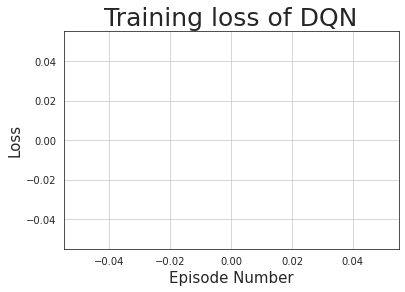

In [ ]:
m.analyze_logs()

Training for 6000 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  327/6000: episode: 1, duration: 1.718s, episode steps: 327, steps per second: 190, episode reward:  3.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 1.318 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  702/6000: episode: 2, duration: 1.078s, episode steps: 375, steps per second: 348, episode reward:  3.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 1.349 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 1076/6000: episode: 3, duration: 6.717s, episode steps: 374, steps per second:  56, episode reward:  3.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 0.807 [0.000, 3.000],  loss: 2641.910590, mean_q: 390.522754, mean_eps: 0.100000
 1514/6000: episode: 4, duration: 2.976s, episode steps: 438, steps per second: 147, episode reward:  3.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 1.256 [0.000, 3.000],  loss: 2901.644042, mean_q: 379.222990, mean_eps: 0.100000
 1779/6000: episode: 5, duration: 1.860s, episode steps: 265, steps per second: 142, episode reward:  1.000, mean reward:  0.004 [ 0.000,  1.000], mean action: 1.302 [0.000, 3.000],  loss: 2847.294191, mean_q: 379.087031, mean_eps: 0.100000
 2157/6000: episode: 6, duration: 3.477s, episode steps: 378, steps per second: 109, episode reward:  1.000, mean reward:  0.003 [ 0.000,  1.000], mean action: 1.291 [0.000, 3.000],  loss: 2745.351764, mean_q: 376.099425, mean_eps: 0.100000
done, took 19.177 seconds


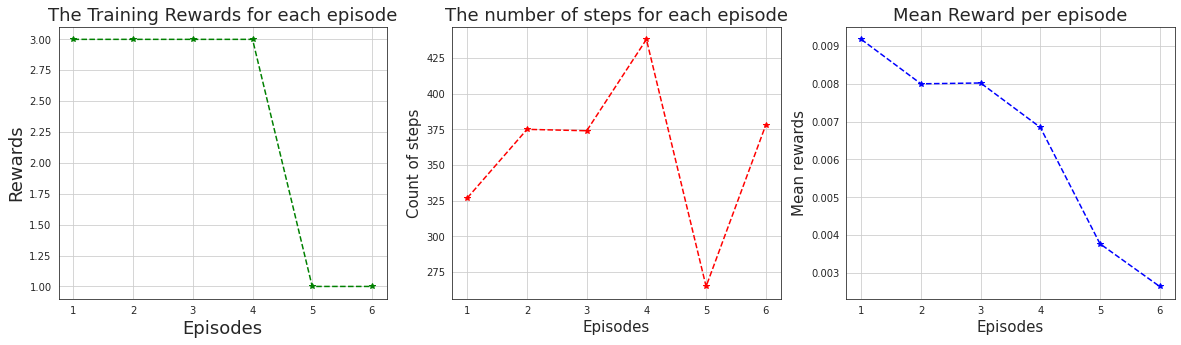

<Figure size 432x288 with 0 Axes>

In [ ]:
m.resume_training()

In [ ]:
m.build_dnn()

In [ ]:
m.build_agent()

Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  304/10000: episode: 1, duration: 2.062s, episode steps: 304, steps per second: 147, episode reward:  2.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 1.326 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  586/10000: episode: 2, duration: 0.685s, episode steps: 282, steps per second: 412, episode reward:  2.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 0.865 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  789/10000: episode: 3, duration: 0.480s, episode steps: 203, steps per second: 423, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 0.631 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 1092/10000: episode: 4, duration: 5.026s, episode steps: 303, steps per second:  60, episode reward:  2.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 0.446 [0.000, 3.000],  loss: 19928.296919, mean_q: 485.839426, mean_eps: 0.100000
 1340/10000: episode: 5, duration: 1.377s, episode steps: 248, steps per second: 180, episode reward:  2.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 1.028 [0.000, 3.000],  loss: 6127.987907, mean_q: 427.254147, mean_eps: 0.100000
 1868/10000: episode: 6, duration: 2.962s, episode steps: 528, steps per second: 178, episode reward:  3.000, mean reward:  0.006 [ 0.000,  1.000], mean action: 1.104 [0.000, 3.000],  loss: 3757.609573, mean_q: 398.323426, mean_eps: 0.100000
 2200/10000: episode: 7, duration: 2.561s, episode steps: 332, steps per second: 130, episode reward:  2.000, mean reward:  0.006 [ 0.000,  1.000], mean action: 0.536 [0.000, 3.000],  loss: 3157.407418, mean_q: 394.583845, mean_eps: 0.100000
 2513/10000: episode: 8, durati

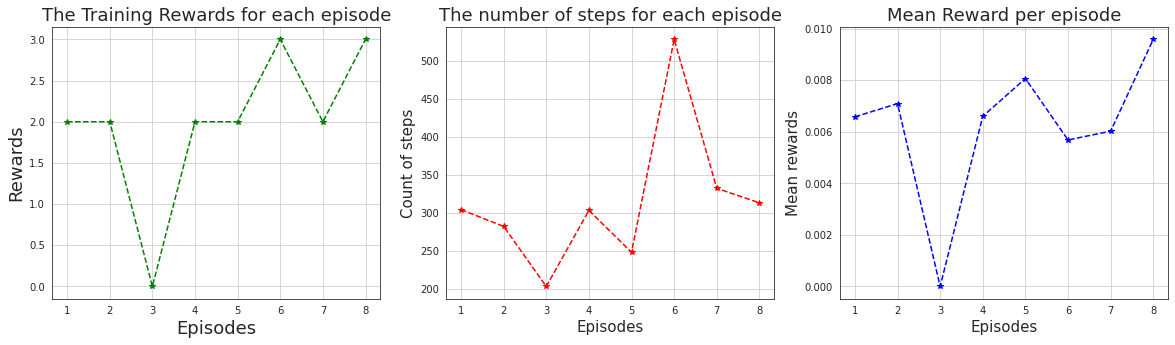

<Figure size 432x288 with 0 Axes>

In [ ]:
m.train_agent(10000)

Testing for 5 episodes ...
Episode 1: reward: 0.000, steps: 10000
Episode 2: reward: 0.000, steps: 10000
Episode 3: reward: 0.000, steps: 10000
Episode 4: reward: 0.000, steps: 10000
Episode 5: reward: 0.000, steps: 10000
0.0


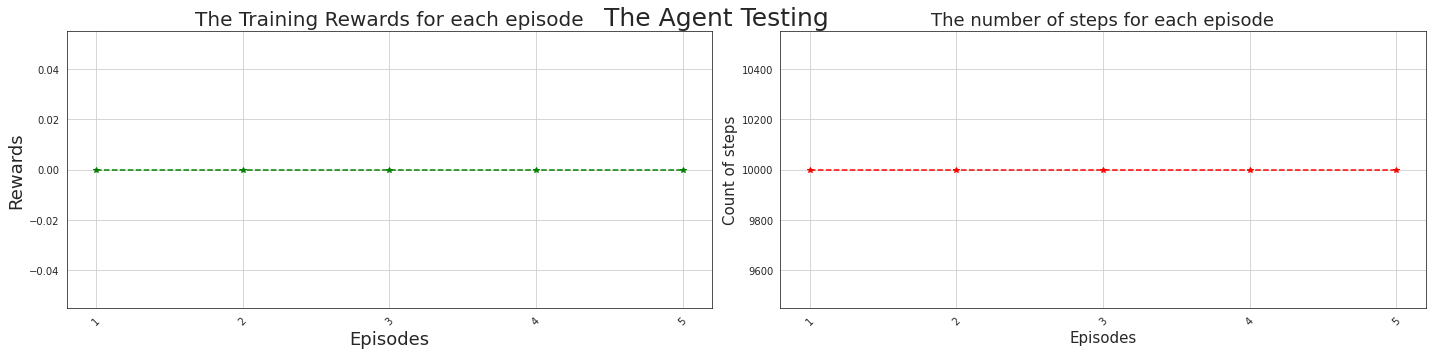

<Figure size 432x288 with 0 Axes>

In [ ]:
m.test_agent(5)

In [ ]:
m.save_weights()

#**Class for CNN Model**

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, Permute
from tensorflow.keras.optimizers import Adam

#Building agent with Keras-RL
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.processors import Processor

# Params to set
WINDOW_LENGTH = 3
INPUT_SHAPE = (84, 84)


class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')  # resize and convert to grayscale
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')  # saves storage in experience memory

    def process_state_batch(self, batch):
        # We could perform this processing step in `process_observation`. In this case, however,
        # we would need to store a `float32` array instead, which is 4x more memory intensive than
        # an `uint8` array. This matters if we store 1M observations.
        processed_batch = batch.astype('float32') / 255.
        return processed_batch


class ModelCNN(ModelRAM):

  def __init__(self, game, model_name):
    super().__init__(game, model_name)


  def build_cnn(self):
    #Building the Keras dense layer neural network model
    input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

    model_cnn = Sequential()
    model_cnn.add(Permute((2, 3, 1), input_shape=input_shape))
    model_cnn.add(Conv2D(32, (8,8), strides=(4, 4), activation='relu', input_shape=input_shape))
    model_cnn.add(Conv2D(64, (4,4), strides=(2, 2), activation='relu'))
    model_cnn.add(Conv2D(64, (3,3), strides=(1, 1), activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(512, activation='relu'))
    model_cnn.add(Dense(256, activation='relu'))
    model_cnn.add(Dense(self.actions, activation='linear'))
    model_cnn.summary()

    self.model = model_cnn
    self.model.save(self.game + '/model')
    return model_cnn

  def build_agent(self, optimizer=Adam(learning_rate=0.0001), POLICY='EPSG'):
    if POLICY == 'EPSG':
      policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., 
                                  value_min=.1, value_test=.2, nb_steps=1e3)
    else:
      policy = BoltzmannQPolicy()

    memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

    processor = AtariProcessor()
    
    dqn = DQNAgent(model=self.model, processor=processor, memory=memory, 
                  policy=policy, enable_dueling_network=True, dueling_type='avg', 
                  nb_actions=self.actions, nb_steps_warmup=1000, 
                  gamma=.99, train_interval=4, delta_clip=1.)
    dqn.compile(optimizer)

    self.agent = dqn
    return dqn

In [ ]:
m = ModelCNN('SpaceInvaders-v0', "1M0.00001")

In [ ]:
m.build_cnn()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        6176      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1606144   
                                                                 
 dense_3 (Dense)             (None, 256)               1

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SpaceInvaders-v0/1M0.00001/model/assets


In [ ]:
m.build_agent()

In [ ]:
m.train_agent(1000000)

AttributeError: ignored

In [ ]:
m.resume_training()

120000


Training for 1880000 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


     978/1880000: episode: 1, duration: 5.594s, episode steps: 978, steps per second: 175, episode reward: 280.000, mean reward:  0.286 [ 0.000, 30.000], mean action: 2.392 [0.000, 5.000],  loss: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    1925/1880000: episode: 2, duration: 36.913s, episode steps: 947, steps per second:  26, episode reward: 365.000, mean reward:  0.385 [ 0.000, 30.000], mean action: 2.440 [0.000, 5.000],  loss: 0.547802, mean_q: 15.378088, mean_eps: 0.100000
    2856/1880000: episode: 3, duration: 35.885s, episode steps: 931, steps per second:  26, episode reward: 270.000, mean reward:  0.290 [ 0.000, 30.000], mean action: 2.516 [0.000, 5.000],  loss: 0.416440, mean_q: 14.522863, mean_eps: 0.100000
    3858/1880000: episode: 4, duration: 38.633s, episode steps: 1002, steps per second:  26, episode reward: 295.000, mean reward:  0.294 [ 0.000, 30.000], mean action: 1.694 [0.000, 5.000],  loss: 0.410847, mean_q: 14.384269, mean_eps: 0.100000
    5167/1880000: episode: 5, duration: 50.925s, episode steps: 1309, steps per second:  26, episode reward: 545.000, mean reward:  0.416 [ 0.000, 30.000], mean action: 2.037 [0.000, 5.000],  loss: 0.421754, mean_q: 14.010541, mean_eps: 0.100000
    6071/1880000: 

Testing for 5 episodes ...
Episode 1: reward: 0.000, steps: 10000
Episode 2: reward: 0.000, steps: 10000
Episode 3: reward: 0.000, steps: 10000
Episode 4: reward: 0.000, steps: 10000
Episode 5: reward: 0.000, steps: 10000
0.0


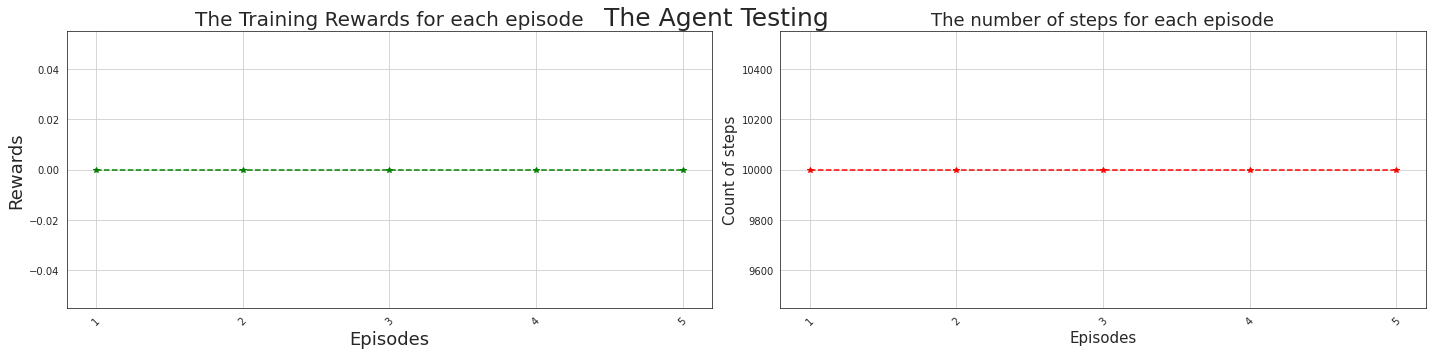

<Figure size 432x288 with 0 Axes>

In [ ]:
m.test_agent(5)

In [ ]:
m.save_weights()

#**Working with the RAM version of the game**

In [ ]:
env = gym.make('Breakout-ram-v0')
ram = env.observation_space.shape
actions = env.action_space.n

In [ ]:
actions ##Number of actions

4

In [ ]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [ ]:
##Random agent playing
episodes = 25
episodes_list = [i for i in range(1,episodes+1)]
s = []
for episode in range(1,episodes+1):
  state = env.reset()
  done = False
  score = 0
  while not done:
    action = random.choice([0,1,2,3])
    n_state, reward, done, info = env.step(action)
    score+=reward
  s.append(score)
  print('Episode {} Score {}:'.format(episode, score))
env.close()

plt.plot(episodes_list,s, '--ro')
plt.title('Random Agent playing 100 such games of Breakout', fontsize = 20);
plt.savefig('RandomAgent_playingBreakout_RAM.png')

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
##Building the Keras dense layer neural network model
#Architecture 1
def neural_network_1(ram, actions):
  input_shape = ram[0]
  seq_model = Sequential()
  seq_model.add(Flatten(input_shape=(1,ram[0])))
  seq_model.add(Dense(256, activation='relu'))
  seq_model.add(Dense(128, activation = 'relu'))
  seq_model.add(Dense(actions, activation='linear'))
  print(seq_model.summary())
  return seq_model


In [ ]:
model_nn_ram = neural_network_1(ram,actions)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 66,436
Trainable params: 66,436
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
##Building agent with Keras-RL
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [ ]:
def build_agent(m, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=1e3)
    memory = SequentialMemory(limit=1000, window_length=1)
    dqn = DQNAgent(model=m, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    return dqn

In [ ]:
d = build_agent(model_nn_ram, actions)
d.compile(Adam(lr=1e-4))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
env

<TimeLimit<AtariEnv<Breakout-ram-v0>>>

## **First experiment 10k steps for training**

In [ ]:
train_history = d.fit(env, nb_steps=1e4, visualize=False, verbose=2)

In [ ]:
##For 10k steps
scores = d.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))
d.save_weights('dqn_weights_10k_ram_temp.h5f')

In [ ]:
model_nn_ram.metrics_names

['loss']

In [ ]:
train_history.history.keys()

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])

In [ ]:
len(train_history.history['episode_reward'])

37

In [ ]:
#testing based plots
#loss plots
#number of steps per episode for both train and test

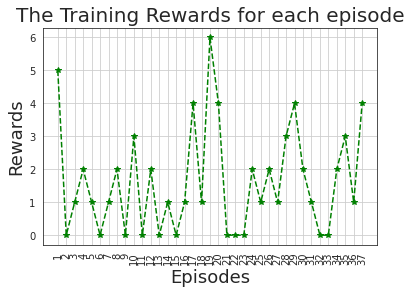

In [ ]:
##Training
nb_of_episodes = [i for i in range(1,len(train_history.history['episode_reward'])+1)]
plt.plot(nb_of_episodes,train_history.history['episode_reward'], '--g*')
plt.grid()
plt.title('The Training Rewards for each episode', fontsize = 20);
plt.xticks(nb_of_episodes, rotation = 90)
plt.xlabel('Episodes', fontsize = 18);
plt.ylabel('Rewards', fontsize = 18);


## **Training for 100k steps**

In [ ]:
train_history_1 = DQN.fit(env, nb_steps=1e5, visualize=False, verbose=2)

In [ ]:
##For 100k steps
scores_1 = DQN.test(env, nb_episodes=10, visualize=False)
print(np.mean(scores_1.history['episode_reward']))
DQN.save_weights('dqn_weights_100k_ram.h5f')

Testing for 10 episodes ...
Episode 1: reward: 2.000, steps: 10000
Episode 2: reward: 2.000, steps: 10000
Episode 3: reward: 2.000, steps: 10000
Episode 4: reward: 2.000, steps: 10000
Episode 5: reward: 2.000, steps: 10000
Episode 6: reward: 2.000, steps: 10000
Episode 7: reward: 0.000, steps: 10000
Episode 8: reward: 0.000, steps: 10000
Episode 9: reward: 0.000, steps: 10000
Episode 10: reward: 2.000, steps: 10000
1.4


# **Working with the input version as state images**

In [ ]:
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
env_full = gym.make('Breakout-v0')
height, width, channels = env_full.observation_space.shape
actions = env_full.action_space.n
episodes = 5
for episode in range(1, episodes+1):
    state = env_full.reset()
    done = False
    score = 0     
    while not done:
        #env_full.render()
        action = random.choice([0,1,2,3])
        n_state, reward, done, info = env_full.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env_full.close()

Episode:1 Score:2.0
Episode:2 Score:2.0
Episode:3 Score:1.0
Episode:4 Score:0.0
Episode:5 Score:0.0


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model_1(height, width, channels, actions):
    model_cnn = Sequential()
    model_cnn.add(Convolution2D(32, (8,8), strides=(4,4), activation='relu', input_shape=(3,height, width, channels)))
    model_cnn.add(Convolution2D(64, (4,4), strides=(2,2), activation='relu'))
    model_cnn.add(Convolution2D(64, (3,3), activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(512, activation='relu'))
    model_cnn.add(Dense(256, activation='relu'))
    model_cnn.add(Dense(actions, activation='linear'))
    model_cnn.summary()
    return model_cnn

In [ ]:
model_A_cnn = build_model_1(height, width, channels, actions)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 51, 39, 32)     6176      
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 24, 18, 64)     32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 22, 16, 64)     36928     
                                                                 
 flatten_2 (Flatten)         (None, 67584)             0         
                                                                 
 dense_9 (Dense)             (None, 512)               34603520  
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 4)                

In [ ]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [ ]:
def build_agent(m, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length=3)
    dqn = DQNAgent(model=m, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    return dqn

In [ ]:
DQN = build_agent(model_A_cnn, actions)
DQN.compile(Adam(lr=1e-4))
DQN.fit(env_full, nb_steps=10000, visualize=False, verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  271/10000: episode: 1, duration: 9.996s, episode steps: 271, steps per second:  27, episode reward:  2.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 1.524 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  437/10000: episode: 2, duration: 5.877s, episode steps: 166, steps per second:  28, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.627 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  728/10000: episode: 3, duration: 10.085s, episode steps: 291, steps per second:  29, episode reward:  2.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 1.533 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  903/10000: episode: 4, duration: 5.916s, episode steps: 175, steps per second:  30, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.554 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 1088/10000: episode: 5, duration: 167.997s, episode steps: 185, steps per second:   1, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.562 [0.000, 3.000],  loss: 155.990677, mean_q: 4.164666, mean_eps: 0.906040
 1370/10000: episode: 6, duration: 512.268s, episode steps: 282, steps per second:   1, episode reward:  2.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 1.496 [0.000, 3.000],  loss: 0.183120, mean_q: -0.236216, mean_eps: 0.889435
 1547/10000: episode: 7, duration: 324.170s, episode steps: 177, steps per second:   1, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.497 [0.000, 3.000],  loss: 0.136707, mean_q: -0.137330, mean_eps: 0.868780
 1966/10000: episode: 8, duration: 762.548s, episode steps: 419, steps per second:   1, episode reward:  5.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 1.425 [0.000, 3.000],  loss: 0.162845, mean_q: -0.111124, mean_eps: 0.841960
 2156/10000: episode: 9, duration: 345.

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, Permute
from tensorflow.keras.optimizers import Adam

#Building agent with Keras-RL
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.processors import Processor

# Params to set
WINDOW_LENGTH = 3
INPUT_SHAPE = (84, 84)


class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')  # resize and convert to grayscale
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')  # saves storage in experience memory

    def process_state_batch(self, batch):
        # We could perform this processing step in `process_observation`. In this case, however,
        # we would need to store a `float32` array instead, which is 4x more memory intensive than
        # an `uint8` array. This matters if we store 1M observations.
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)


class ModelCNN:

  def __init__(self, game):
    self.game = game
    self.env = gym.make(game)
    self.shape = self.env.observation_space.shape
    self.actions = self.env.action_space.n
    self.train_steps = 0
    if not(os.path.isdir(self.game)):
      os.mkdir(self.game)


  def random_run(self, episodes=25):
    #Random agent playing
    episodes_list = [i for i in range(1 ,episodes+1)]
    s = []
    for episode in range(1, episodes+1):
      state = self.env.reset()
      done = False
      score = 0
      while not done:
        action = random.randrange(self.actions)
        n_state, reward, done, info = self.env.step(action)
        score += reward
      s.append(score)
      print('Episode {} Score {}:'.format(episode, score))
    self.env.close()

    plt.plot(episodes_list, s, '--ro')
    plt.title('Random Agent playing ' + str(episodes) + ' such games of ' 
              + self.game, fontsize=20);
    plt.savefig(self.game + '/Random_Agent_' + str(episodes) + '.png')


  def build_cnn(self):
    #Building the Keras dense layer neural network model
    input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

    model_cnn = Sequential()
    model_cnn.add(Permute((2, 3, 1), input_shape=input_shape))
    model_cnn.add(Conv2D(32, (8,8), strides=(4, 4), activation='relu', input_shape=input_shape))
    model_cnn.add(Conv2D(64, (4,4), strides=(2, 2), activation='relu'))
    model_cnn.add(Conv2D(64, (3,3), strides=(1, 1), activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(512, activation='relu'))
    model_cnn.add(Dense(256, activation='relu'))
    model_cnn.add(Dense(self.actions, activation='linear'))
    model_cnn.summary()

    self.model_cnn = model_cnn
    return model_cnn


  def build_agent(self, optimizer=Adam(learning_rate=0.00025)):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., 
                                  value_min=.1, value_test=.2, nb_steps=1e3)

    memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

    processor = AtariProcessor()
    
    dqn = DQNAgent(model=self.model_cnn, processor=processor, memory=memory, 
                   policy=policy, enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=self.actions, nb_steps_warmup=10, 
                   gamma=.99, train_interval=4, delta_clip=1.)
    dqn.compile(optimizer)

    self.agent = dqn
    return dqn


  def train_agent(self, nb_steps=1e4):
    self.train_steps += nb_steps
    self.train_history = self.agent.fit(self.env, nb_steps=nb_steps, 
                                        visualize=False, verbose=2)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    nb_of_episodes = [i for i in range(1, len(self.train_history.history['episode_reward'])+1)]
    ax1.plot(nb_of_episodes, self.train_history.history['episode_reward'], '--g*')
    ax1.grid()
    ax1.set_title('The Training Rewards for each episode', fontsize = 20);
    ax1.set_xticks(nb_of_episodes)
    ax1.set_xticklabels(nb_of_episodes, rotation=45)
    ax1.set_xlabel('Episodes', fontsize=18);
    ax1.set_ylabel('Rewards', fontsize=18);

    ax2.plot(nb_of_episodes, self.train_history.history['nb_episode_steps'], '--r*')
    ax2.grid()
    ax2.set_title('The number of steps for each episode', fontsize = 18);
    ax2.set_xticks(nb_of_episodes)
    ax2.set_xticklabels(nb_of_episodes, rotation=45)
    ax2.set_xlabel('Episodes', fontsize=15);
    ax2.set_ylabel('Count of steps', fontsize = 15);
    f.tight_layout()
    plt.suptitle('The Agent Testing', fontsize=25);

    plt.show()
    plt.savefig(self.game + '/Train_agent_' + str(self.train_steps) + '.png')
  

  def test_agent(self, nb_episodes=25):
    scores = self.agent.test(self.env, nb_episodes=nb_episodes, visualize=False)
    print(np.mean(scores.history['episode_reward']))

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    nb_of_episodes = [i for i in range(1, len(scores.history['episode_reward'])+1)]
    ax1.plot(nb_of_episodes, scores.history['episode_reward'], '--g*')
    ax1.grid()
    ax1.set_title('The Training Rewards for each episode', fontsize = 20);
    ax1.set_xticks(nb_of_episodes)
    ax1.set_xticklabels(nb_of_episodes, rotation=45)
    ax1.set_xlabel('Episodes', fontsize=18);
    ax1.set_ylabel('Rewards', fontsize=18);

    ax2.plot(nb_of_episodes, scores.history['nb_steps'], '--r*')
    ax2.grid()
    ax2.set_title('The number of steps for each episode', fontsize = 18);
    ax2.set_xticks(nb_of_episodes)
    ax2.set_xticklabels(nb_of_episodes, rotation=45)
    ax2.set_xlabel('Episodes', fontsize=15);
    ax2.set_ylabel('Count of steps', fontsize = 15);
    f.tight_layout()
    plt.suptitle('The Agent Testing', fontsize=25);

    plt.show()
    plt.savefig(self.game + '/Test_agent_' + str(self.train_steps) + '_' 
                + str(nb_episodes) + '.png')
  

  def save_weights(self):
    self.agent.save_weights(self.game + '/DNN_weights_' + str(self.train_steps) 
    + '.h5f')

New Section. -Ananya


In [ ]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.optimizers import Adam

#Building agent with Keras-RL
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy, BoltzmannQPolicy
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

# Params to set
WINDOW_LENGTH = 3


class ModelRAM:

  def __init__(self, game):
    self.game = game
    self.env = gym.make(game)
    self.ram = self.env.observation_space.shape
    self.actions = self.env.action_space.n
    self.train_steps = 0
    if not(os.path.isdir(self.game)):
      os.mkdir(self.game)
    if self.game == 'Breakout-v0-ram' or self.game == 'Breakout-v0':
      self.TRAIN_INTERVAL = 4
    else:
      self.TRAIN_INTERVAL = 3


  def random_run(self, episodes=25):
    #Random agent playing
    episodes_list = [i for i in range(1 ,episodes+1)]
    s = []
    for episode in range(1, episodes+1):
      state = self.env.reset()
      done = False
      score = 0
      while not done:
        action = random.randrange(self.actions)
        n_state, reward, done, info = self.env.step(action)
        score += reward
      s.append(score)
      print('Episode {} Score {}:'.format(episode, score))
    self.env.close()

    plt.plot(episodes_list, s, '--ro')
    plt.title('Random Agent playing ' + str(episodes) + ' such games of ' 
              + self.game, fontsize=20);
    plt.savefig(self.game + '/Random_Agent_' + str(episodes) + '.png')


  def build_dnn(self):
    #Building the Keras dense layer neural network model
    input_shape = self.ram[0]
    seq_model = Sequential()
    seq_model.add(Flatten(input_shape=(WINDOW_LENGTH, self.ram[0])))
    seq_model.add(Dense(256, activation='relu'))
    seq_model.add(Dense(128, activation='relu'))
    seq_model.add(Dropout(0.5))
    seq_model.add(Dense(self.actions, activation='linear'))
    print(seq_model.summary())

    self.dnn_model = seq_model
    return seq_model


  def build_agent(self, optimizer=Adam(learning_rate=1e-4), POLICY = 'EPSG'):
    if POLICY == 'EPSG':
      policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., 
                                  value_min=.1, value_test=.2, nb_steps=1e3)
    else:
      policy = BoltzmannQPolicy()
    
    memory = SequentialMemory(limit=1000, window_length=WINDOW_LENGTH)

    dqn = DQNAgent(model=self.dnn_model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=self.actions, nb_steps_warmup=1000, train_interval= self.TRAIN_INTERVAL)
    dqn.compile(optimizer)

    self.agent = dqn
    return dqn


  def train_agent(self, nb_steps=1e4):
    self.train_steps += nb_steps
    checkpoints = self.game + '/Train_agent_dqn_weights_{step}.h5f'
    
    callbacks = [ModelIntervalCheckpoint(checkpoints, interval=2500)]
    self.train_history = self.agent.fit(self.env, nb_steps=nb_steps, 
                                        visualize=False, verbose=2, callbacks = callbacks)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
    nb_of_episodes = [i for i in range(1, len(self.train_history.history['episode_reward'])+1)]
    ax1.plot(nb_of_episodes, self.train_history.history['episode_reward'], '--g*')
    ax1.grid()
    ax1.set_title('The Training Rewards for each episode', fontsize = 18);
    #ax1.set_xticks(nb_of_episodes)
    #ax1.set_xticklabels(nb_of_episodes, rotation=45)
    ax1.set_xlabel('Episodes', fontsize=18);
    ax1.set_ylabel('Rewards', fontsize=18);

    ax2.plot(nb_of_episodes, self.train_history.history['nb_episode_steps'], '--r*')
    ax2.grid()
    ax2.set_title('The number of steps for each episode', fontsize = 18);
    ax2.set_xticks(nb_of_episodes)
    #ax2.set_xticklabels(nb_of_episodes, rotation=45)
    ax2.set_xlabel('Episodes', fontsize=15);
    ax2.set_ylabel('Count of steps', fontsize = 15);


    mean_rewards = [i/j for i,j in zip(self.train_history.history['episode_reward'], self.train_history.history['nb_episode_steps'])]
    #print(mean)
    ax3.plot(nb_of_episodes,mean_rewards, '--b*')
    ax3.grid()
    ax3.set_title('Mean Reward per episode', fontsize = 18)
    ax3.set_ylabel('Mean rewards', fontsize = 15)
    ax3.set_xlabel('Episodes', fontsize = 15)
    plt.show()
    plt.savefig(self.game + '/Train_agent_' + str(self.train_steps) + '.png')
    f.tight_layout()
    plt.suptitle('The Agent Training', fontsize=25);  

  def test_agent(self, nb_episodes=25):
    scores = self.agent.test(self.env, nb_episodes=nb_episodes, visualize=False)
    print(np.mean(scores.history['episode_reward']))

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    nb_of_episodes = [i for i in range(1, len(scores.history['episode_reward'])+1)]
    ax1.plot(nb_of_episodes, scores.history['episode_reward'], '--g*')
    ax1.grid()
    ax1.set_title('The Training Rewards for each episode', fontsize = 20);
    ax1.set_xticks(nb_of_episodes)
    ax1.set_xticklabels(nb_of_episodes, rotation=45)
    ax1.set_xlabel('Episodes', fontsize=18);
    ax1.set_ylabel('Rewards', fontsize=18);

    ax2.plot(nb_of_episodes, scores.history['nb_steps'], '--r*')
    ax2.grid()
    ax2.set_title('The number of steps for each episode', fontsize = 18);
    ax2.set_xticks(nb_of_episodes)
    ax2.set_xticklabels(nb_of_episodes, rotation=45)
    ax2.set_xlabel('Episodes', fontsize=15);
    ax2.set_ylabel('Count of steps', fontsize = 15);
    f.tight_layout()
    plt.suptitle('The Agent Testing', fontsize=25);

    plt.show()
    plt.savefig(self.game + '/Test_agent_' + str(self.train_steps) + '_' 
                + str(nb_episodes) + '.png')
  

  def save_weights(self):
    self.agent.save_weights(self.game + '/DNN_weights_' + str(self.train_steps) 
    + '.h5f')